In [2]:
import numpy as np
import scipy.sparse as spa
import scipy.sparse.linalg as spalg
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

## For the heat equation we incorporate time dependence via the Forward Euler method

#### This leads us to solve the following equation:

$$\frac{U_{i,j}^{n+1} - U_{i,j}^{n}}{\Delta t} = \frac{U_{i-1,j}^{n} + U_{i+1,j}^{n} +  U_{i,j-1}^{n} + U_{i,j+1}^{n} - 4U_{i,j}^{n}}{h^2} $$

where n is the time index, and (i,j) are your spatial indices

we transform this equation into matrix operations via the following equation:

$$ U^{n+1} = (\gamma A+I)U^n $$

where $U^{n+1}$ is your potential vector advanced 1 time step, $\gamma = \frac{\Delta t}{h^2}$, A is your Laplace finite difference matrix, I is an identity matrix, and $U^{n}$ is the current potential vector

## These first few cells set up your laplace matrix (A)

In [3]:
N = 101

In [4]:
D = np.zeros(((N-2),(N-2)))
I = np.eye((N-2),(N-2))

In [5]:
off_diag = np.ones((1,(N-3)))[0]
on_diag = np.ones((1,(N-2)))[0]*(-4)

In [6]:
D = D + np.diag(off_diag,k=1) + np.diag(off_diag,k=-1) + np.diag(on_diag)

In [7]:
A = np.zeros(((N-2)**2,(N-2)**2))

In [8]:
for i in range(0,N-2):
    A[(i*(N-2)):N-2+(i*(N-2)),(i*(N-2)):N-2+(i*(N-2))] = D
for i in range(1,N-2):
    A[(i*(N-2)):(i*(N-2)+(N-2)),(i*(N-2)-(N-2)):(i*(N-2))] = I
    A[(i*(N-2)-(N-2)):(i*(N-2)),(i*(N-2)):(i*(N-2)+(N-2))] = I

In [9]:
A

array([[-4.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -4.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -4.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -4.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -4.]])

## Your identity matrix

In [8]:
I_full = np.eye((N-2)**2,(N-2)**2)

## Establish your boundary conditions (initial $U^o$) and initialize $U^{n+1}$

In [9]:
b = np.zeros(((N-2)*(N-2)))

b[(N-3)*(N-2):(N-2)*(N-2)] = np.ones(((N-2)))*100
b[0:(N-2)] = np.ones(((N-2)))*-100

U = b
U_1 = np.zeros(((N-2)*(N-2)))

## Set up ($\gamma A + I$) into a single matrix operator (oper)

In [10]:
gamma = .1
A_spa = spa.csc_matrix(gamma*A)
I_spa = spa.csc_matrix(I_full)

oper = A_spa + I_spa

## Computing all of the pontentials for all time steps and storing in U_store[time_index, potential_vector index]

In [11]:
t_iter = 30000
U_store = np.zeros((t_iter,(N-2)**2))
for i in range(0,t_iter):
    U_1 = oper.dot(U)
    U = U_1
    U_store[i,:] = U
    U[(N-3)*(N-2):(N-2)*(N-2)] = np.ones(((N-2)))*100
    U[0:(N-2)] = np.ones(((N-2)))*-100

## Plotting

In [12]:
x = np.arange(0,N-2)
y = np.arange(0,N-2)
X,Y = np.meshgrid(x,y)

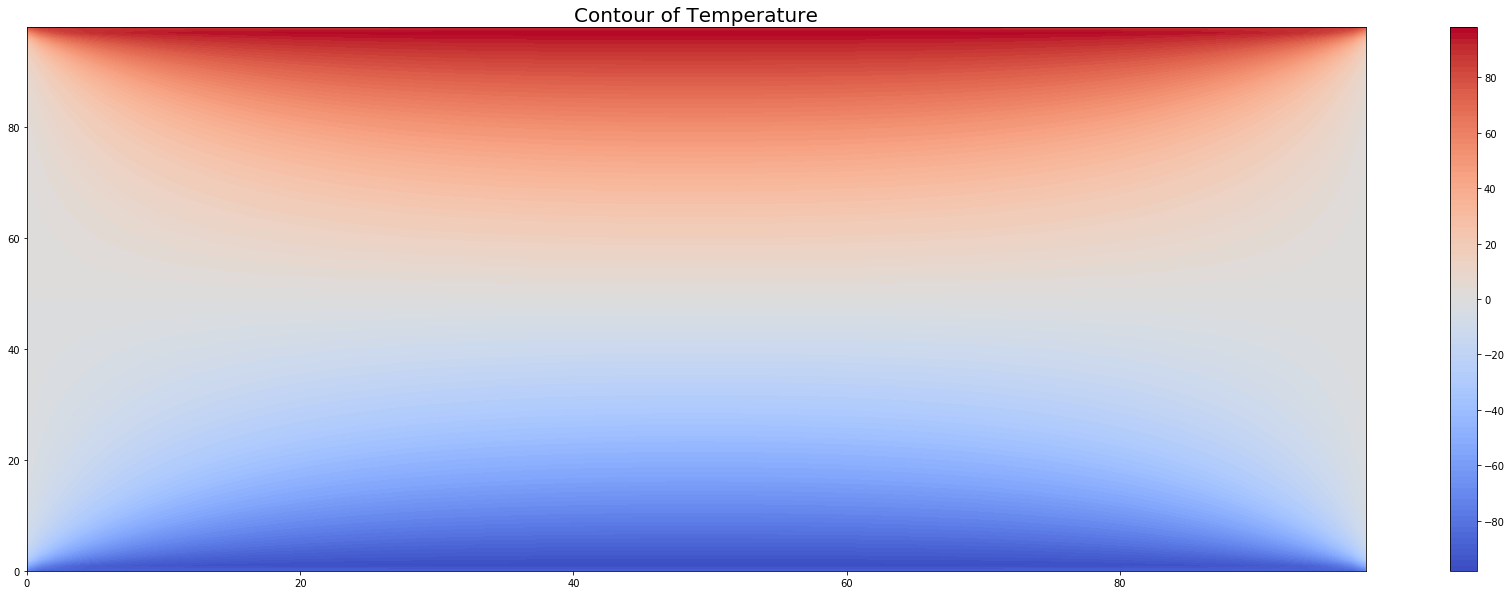

In [17]:
#Set interpolation and colormap
colorinterp = 100
colormap = plt.cm.coolwarm
figure = plt.figure(figsize=(30,10))
plt.contourf(X,Y,np.reshape(U_store[5000,:],((N-2),(N-2))), colorinterp, cmap=colormap)
plt.title("Contour of Temperature", fontsize=20)
#Set Colorbar
plt.colorbar()
#Show the result in the plot winow
plt.show()
print("")